## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle on Top Spotify Songs. No need to dowload it, it is already in the `exercises` directory.

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

In [30]:
# import all librarys and modules needed
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

print(df.to_string())


                                                                                                                      track_name                                                                                                               artist(s)_name  artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts                                                                                                 streams  in_apple_playlists  in_apple_charts in_deezer_playlists  in_deezer_charts in_shazam_charts  bpm  key   mode  danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
0                                                                                            Seven (feat. Latto) (Explicit Ver.)                                                                                                             Latto, Jung Kook             2           2023               7            14                   55

Step 1: Data understanding
- dataframe shape - 953 rows and 24 columns
- head and tail
- dtypes
- describe

In [40]:
df.shape 

(953, 14)

In [50]:
df.head()


,track_name,artist(s)_name,released_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,141381703.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,2023,133716286.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,2023,140003974.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,2019,800840817.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,2023,303236322.0,144,A,Minor,65,23,80,14,63,11,6


In [39]:
df = df[['track_name', 'artist(s)_name', 
# 'artist_count', 
    'released_year',
    #    'released_month', 'released_day', 'in_spotify_playlists',
    #    'in_spotify_charts', 
    'streams', 
    # 'in_apple_playlists', 'in_apple_charts',
    #    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 
    'bpm',
       'key', 'mode', 
       'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].copy()

In [49]:
df.dtypes
# df['streams'] = pd.to_numeric(df['streams'], errors='coerce')



track_name             object
artist(s)_name         object
released_year           int64
streams               float64
bpm                     int64
key                    object
mode                   object
danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
dtype: object

In [35]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [51]:
df.isna().sum() #providing a sum of how many NaN values are present in each column

track_name             0
artist(s)_name         0
released_year          0
streams                1
bpm                    0
key                   95
mode                   0
danceability_%         0
valence_%              0
energy_%               0
acousticness_%         0
instrumentalness_%     0
liveness_%             0
speechiness_%          0
dtype: int64

In [55]:
df.loc[df.duplicated()] #provides location of duplciated row

,track_name,artist(s)_name,released_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
764,About Damn Time,Lizzo,2022,723894473.0,109,A#,Minor,84,72,74,10,0,34,7


In [56]:
df.query('track_name == "About Damn Time"')

,track_name,artist(s)_name,released_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
372,About Damn Time,Lizzo,2022,723894473.0,109,A#,Minor,84,72,74,10,0,34,7
764,About Damn Time,Lizzo,2022,723894473.0,109,A#,Minor,84,72,74,10,0,34,7


### Creating Visualizations

Now that the data is ready, you can use the dataset to create a number of different visualizations. You do not need to make the visualizations perfect; this is just for practice.

#### Line Chart

<Axes: title={'center': 'Top Streamed Artist(s)'}, xlabel='artist(s)_name'>

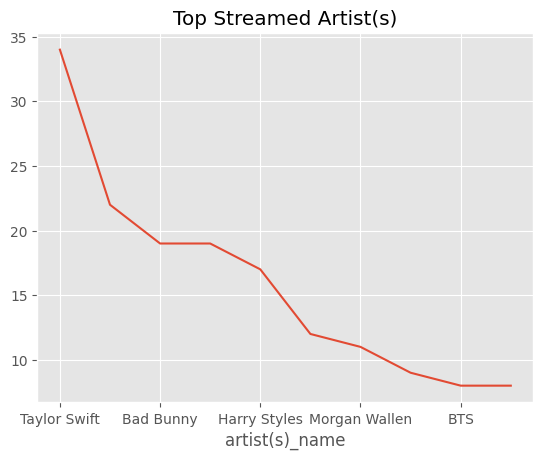

In [62]:
# Single line chart
df['artist(s)_name'].value_counts() \
    .head(10) \
        .plot(title= 'Top Streamed Artist(s)')


In [ ]:
# Multiple Line chart 


#### Bar Chart

In [ ]:
# Vertical bar chart



In [ ]:
# Horizontal bar chart


In [ ]:
# Grouped bar chart


#### Scatter Plot

<Axes: xlabel='danceability_%', ylabel='energy_%'>

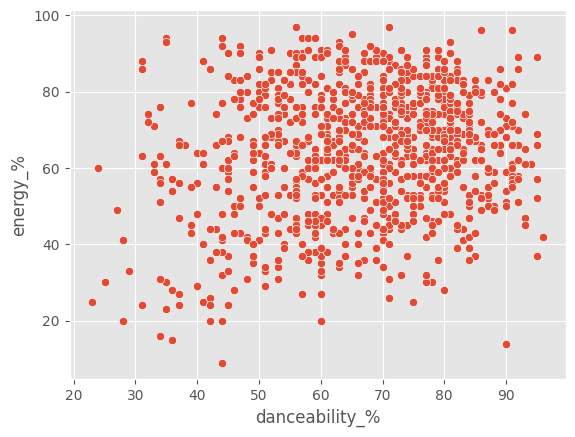

In [76]:
# scatter plot
# df.plot(kind='scatter', 
#         x='danceability_%', 
#         y='energy_%',
#         title='danceability_% vs. energy_%')
# plt.show()

sb.scatterplot(x='danceability_%', 
                y='energy_%',
                data=df)

#### Histogram

<Axes: title={'center': 'Released Years'}, ylabel='Frequency'>

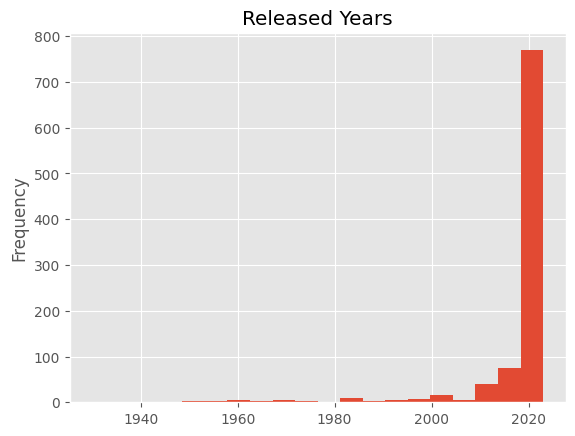

In [66]:
# histogram
df['released_year'].plot(kind='hist', bins=20, title= 'Released Years')

#### Pie Chart

In [78]:
# pie chart
df.groupby(['key']).sum().plot(kind='pie', y='mode')


TypeError: '<' not supported between instances of 'str' and 'int'